In [24]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/Housing.csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

df = df.drop('furnishingstatus', axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [6]:
x_train = df.iloc[:, 1:]
y_train = df.iloc[:, 0]


In [7]:
x_train = x_train.values
y_train = y_train.values
x_train[:5]

array([[7420,    4,    2,    3,    1,    0,    0,    0,    1,    2,    1],
       [8960,    4,    4,    4,    1,    0,    0,    0,    1,    3,    0],
       [9960,    3,    2,    2,    1,    0,    1,    0,    0,    2,    1],
       [7500,    4,    2,    2,    1,    0,    1,    0,    1,    3,    1],
       [7420,    4,    1,    2,    1,    1,    1,    0,    1,    2,    0]])

In [28]:
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x_train)
x_normalized[:5]

array([[0.39656357, 0.6       , 0.33333333, 0.66666667, 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.66666667,
        1.        ],
       [0.5024055 , 0.6       , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        ],
       [0.57113402, 0.4       , 0.33333333, 0.33333333, 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.66666667,
        1.        ],
       [0.40206186, 0.6       , 0.33333333, 0.33333333, 1.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ,
        1.        ],
       [0.39656357, 0.6       , 0.        , 0.33333333, 1.        ,
        1.        , 1.        , 0.        , 1.        , 0.66666667,
        0.        ]])

In [20]:
class LinearRegression:
    def __init__(self, learning_rate=0.1, n_itrs=1000):
        self.learning_rate = learning_rate
        self.n_itrs = n_itrs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_itrs):
            y_pred = self._approximation(X, self.weights, self.bias)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)


            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    
    
    def predict(self, X):
        return self._approximation(X, self.weights, self.bias)
    
    def _approximation(self, X, w, b):  # [[1,2 ], [0, 1]]
        return np.dot(X, w) + b

In [21]:
model = LinearRegression()
model.fit(x_normalized, y_train)

In [25]:
y_pred = model.predict(x_normalized)

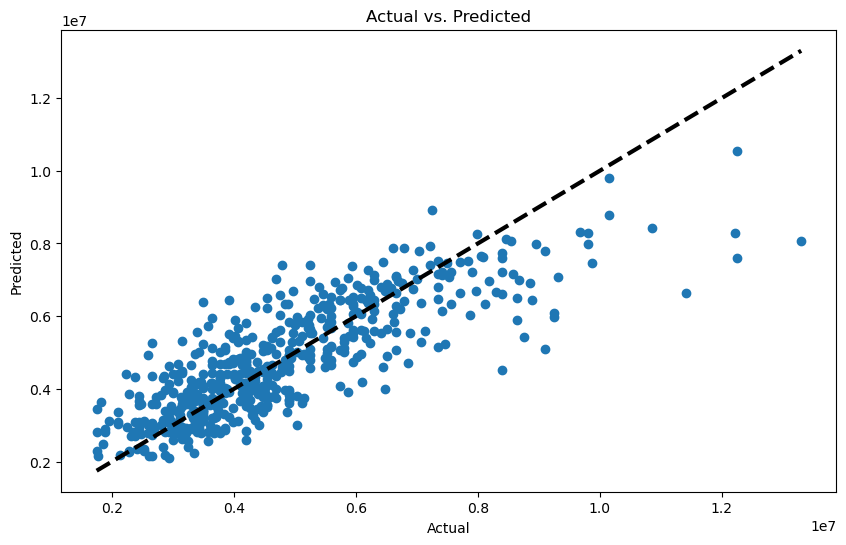

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()